In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from matplotlib import rcParams

rcParams['figure.dpi']=150

In [3]:
#Cargamos los datos obtenidos en el laboratorio:

In [4]:
data = np.loadtxt('datos_practica.txt')

In [91]:
fraccion_molar_1 = data[:,0]
indice_refraccion_1 = data[:,2]
s_n = 0.00005
print(fraccion_molar_1)
print(indice_refraccion_1)

[0.005488   0.00503218 0.0013423  0.04935    0.0589494  0.0088245
 0.00938045 0.00293783 0.0386527  0.0210269  0.0299641 ]
[1.3386  1.33124 1.33203 1.35677 1.36361 1.34237 1.34078 1.33717 1.35219
 1.34668 1.3482 ]


In [90]:
#Eliminamos posibles datos erroneos


#datos fraccion molar:
eliminacion_1 = np.delete(fraccion_molar_1,1)
eliminacion_2 = np.delete(eliminacion_1,4)
fraccion_molar = np.delete(eliminacion_2,1)

#datos indice de refraccion:
eliminacion_3=np.delete(indice_refraccion_1,1)
eliminacion_4 = np.delete(eliminacion_3,4)
indice_refraccion=np.delete(eliminacion_4,1)

print(eliminacion_2)
print(eliminacion_3)


[0.005488   0.0013423  0.04935    0.0589494  0.00938045 0.00293783
 0.0386527  0.0210269  0.0299641 ]
[1.3386  1.33203 1.35677 1.36361 1.34237 1.34078 1.33717 1.35219 1.34668
 1.3482 ]


In [7]:
#calculo la incertidumbre de la fracción molar:

#masas:
masa_agua = 8,46581      # [g]
s_masa_agua = 0.00005    # [g]
masa_ciclop = 1.58984    # [g]
s_masa_ciclop = 0.00005  # [g]
#moles:
mol_agua = 0.4700616     # [mol]
s_mol_agua = 0.0000006   # [mol]
mol_ciclop = 0.0188997   # [mol]
s_mol_ciclop = 0.0000028 # [mol]
mol_total = 0.4889613    # [mol]
s_mol_total = 0.0000028  # [mol]

#Fraccion molar por propagación de incertidumbres:

FM_a = 0.9613473
s_FM_a = 0.0000057


FM_cp = 0.0386527
s_FM_cp = 0.0000057



In [8]:
#Vamos a representar la fraccion molar frente al indice de refraccion:

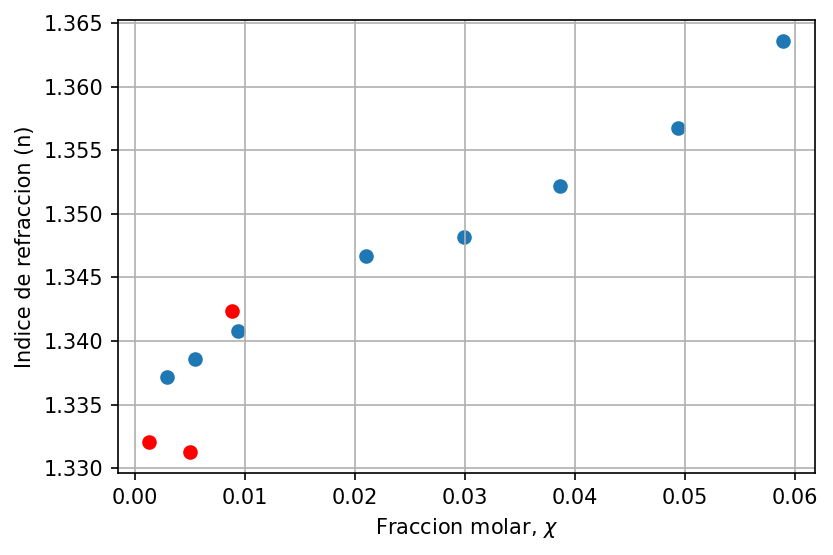

In [85]:
plt.scatter(fraccion_molar,indice_refraccion)

#datos eliminados:
plt.scatter(0.005032,1.33124,c='red')
plt.scatter(0.0088245,1.34237,c='red')
plt.scatter(0.0013423,1.33203,c='red')
plt.xlabel('Fraccion molar, $\chi$')
plt.ylabel('Indice de refraccion (n)')



plt.grid()
plt.savefig('molar_refraccion_corr.pdf')
plt.show()

Vamos a descartar dos datos que se desvian de la tendencia debido a posibles errores:
$$
punto~1- (0.005032,1.33124)
$$
$$
punto~2- (0.0088245,1.34237)
$$
$$
punto~3- (0.0013423,1.33203)
$$

Para obtener la fraccion molar de saturacion vamos a ajustar los datos a una ecuacion cuadratica de la forma $n=X^2 a + bX+c$:

In [10]:
#Definimos funcion a ajustar:

In [11]:
def cuadratica(x,d,e,f):
    return (x**2)*d +x*e + f

In [81]:
popt, pcov = curve_fit(cuadratica, fraccion_molar, indice_refraccion)

In [83]:
parametros_ajuste_1 = popt

In [14]:
perr = np.sqrt(np.diag(pcov))

In [15]:
perr

array([1.33678518e+00, 8.17341721e-02, 9.41204364e-04])

In [16]:
Xfit=np.arange(0.00001,0.075,0.0001) #Valores para x equidistantes

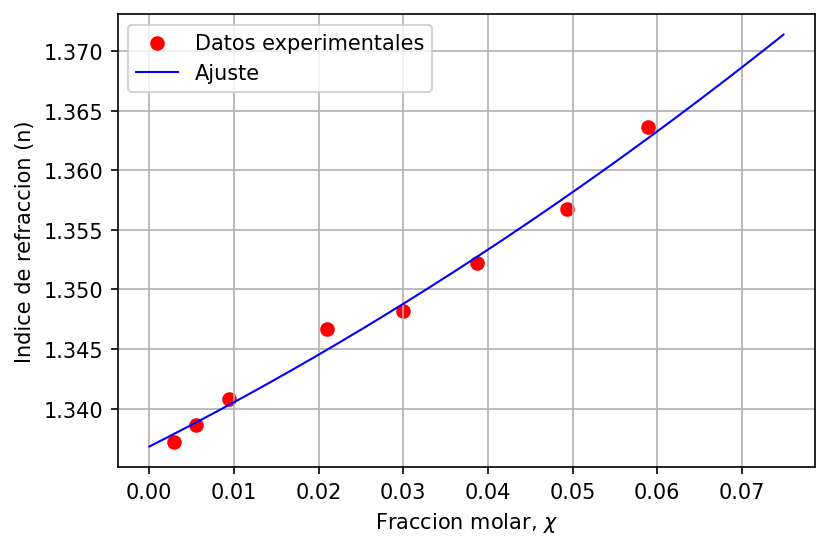

In [84]:
plt.scatter(fraccion_molar,indice_refraccion,
            c='red',
            label='Datos experimentales')

plt.plot(Xfit,cuadratica(Xfit,*parametros_ajuste_1),
         'b',
        linewidth=1,
        label='Ajuste')

plt.xlabel('Fraccion molar, $\chi$')
plt.ylabel('Indice de refraccion (n)')
plt.legend()
plt.grid()
plt.savefig('ajustecuadratico.pdf')
plt.show()

In [18]:
#Los parametros del ajuste y sus errores son:

In [19]:
a=popt[0]
b=popt[1]
c=popt[2]
s_a=perr[0]
s_b=perr[1]
s_c=perr[2]
print('a=',a)
print('s(a)=',s_a)
print('b=',b)
print('s(b)=',s_b)
print('c=',c)
print('s(c)=',s_c)

a= 1.3841811390649332
s(a)= 1.3367851791221697
b= 0.3576660569777707
s(b)= 0.08173417211917168
c= 1.336819301893694
s(c)= 0.0009412043637471004


Obtenidos los valores de las constantes, despejaremos en la ecuacion cuadratica el valor de la fraccion molar de saturacion utilizando el valor que nos dan del indice de refraccion de la muestra saturada $n_{sat} = 1.36704$


$aX^2 + bX +(c-1.36704)=0$

In [20]:
#Resolvemos polinomio

In [21]:
n_sat=1.36704
d=c-n_sat
pol=np.poly1d([a,b,d])

In [22]:
roots=pol.roots
print(roots)

[-0.32547545  0.06708004]


In [23]:
#El valor que buscamos será el de 0.0706352 dado que el otro está fuera del rango admisible

In [24]:
punto_saturacion=roots[1]
print('punto de saturacion=',punto_saturacion)
print('indice de refraccion de saturacion=',n_sat)

punto de saturacion= 0.06708004157479015
indice de refraccion de saturacion= 1.36704


In [25]:
#Vamos a graficarlo:

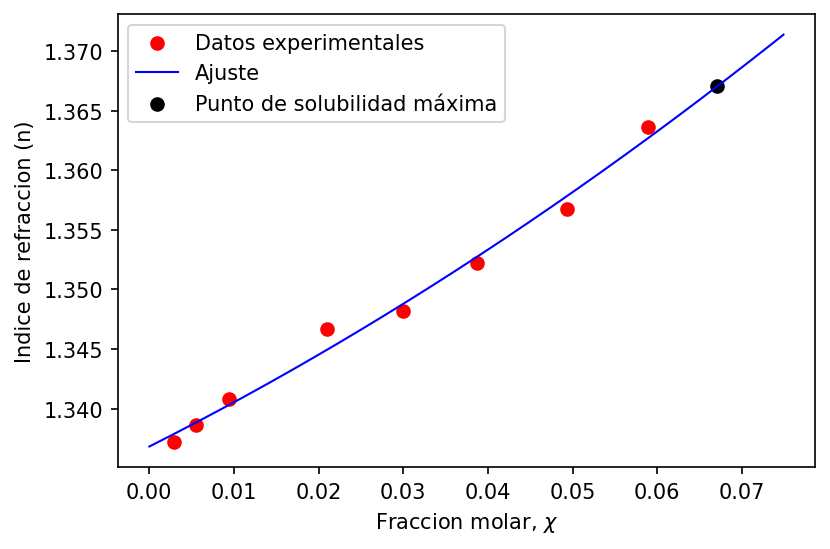

In [79]:
plt.scatter(fraccion_molar,indice_refraccion,
            c='red',
            label='Datos experimentales')

plt.plot(Xfit,cuadratica(Xfit,a,b,c),
         'b',
        linewidth=1,
        label='Ajuste')

plt.scatter(punto_saturacion,n_sat,
            c='black',
           label='Punto de solubilidad máxima')

plt.xlabel('Fraccion molar, $\chi$')
plt.ylabel('Indice de refraccion (n)')
plt.legend()
plt.savefig('ajuste1.pdf')
plt.show()

### Calculemos el error de la fraccion molar de saturacion  utilizando propagacion de incertidumbres:

In [27]:
def s_sat(a,b,c,sa,sb,sc,D):
    return np.sqrt(     (((1/(2*a**2))*(((((2*a*D)-(b**2))/np.sqrt((b**2)-4*a*D))+b)))**2)*sa**2 +   (((1/(2*a))*((((b)/np.sqrt((b**2)-4*a*D))-1)))**2)*sb**2   +   ((((((-1)/np.sqrt((b**2)-4*a*D)))))**2)*sc**2 )

In [28]:
# Se han utilizado los valores obtenidos del ajuste cuadratico y d=c-n_{sat}

In [29]:
s_sat(a,b,c,s_a,s_b,s_c,d)

0.01507855137341979

## Pasemos ahora al calculo de la *compresibilidad adiabatica*

Podemos escribir la compresibilidad adiabatica en funcion de la densidad y la velocidad el sonido:

$k_S=\frac{1}{\rho v_S^2}$

Las medidas obtenidas han sido:

In [30]:
vel_sonido_1=data[:,4]
densidad_1=data[:,3]


#Eliminamos posibles datos erroneos


#datos velocidad del sonido:
eliminacion_5=np.delete(vel_sonido_1,1)
eliminacion_6=np.delete(eliminacion_5,4)
vel_sonido=np.delete(eliminacion_6,1)

#datos densidad:
eliminacion_7=np.delete(densidad_1,1)
eliminacion_8=np.delete(eliminacion_7,4)
densidad=np.delete(eliminacion_8,1)


#Convertimos al sistema internacional las unidades de densidad:
densidad_mKg=densidad*1000



print('velocidad del sonido=',vel_sonido)
print('densidad=',densidad_mKg)

velocidad del sonido= [1512.69 1578.24 1580.08 1522.89 1504.92 1571.63 1547.24 1562.06]
densidad= [996.966 996.77  996.309 996.969 996.986 997.075 997.079 997.143]


## Calculo compresibilidad adiabatica y su incertidumbre

In [31]:
#Calculo compresibilidad adiabatica y su incertidumbre
def compr_adiab(i,j):
    return 1/(i*(j**2))

In [32]:
compresibilidad_adiabatica=compr_adiab(densidad_mKg,vel_sonido)

In [33]:
#Incertidumbre:
def incert_compr_adiab(a1,b1,c1,d1):
    return np.sqrt(((1/((a1**2)*(b1**2)))**2) * (c1**2) + ((1/(a1*b1**3))**2) * (d1**2))

In [34]:
s_densidad=0.005 #en [Kg/m^3]
s_vel_son=0.05 #[m/s]

In [35]:
s_compresibilidad_adiabatica = incert_compr_adiab(densidad_mKg,vel_sonido,s_densidad,s_vel_son)


# Compresibilidad Adiabática

In [36]:
print('compresibilidad adiabatica=',compresibilidad_adiabatica)# con unidades de 1/Pa
print('error compresibilidad adiabatica=',s_compresibilidad_adiabatica)# con unidades de 1/Pa

compresibilidad adiabatica= [4.38348758e-10 4.02771701e-10 4.02020125e-10 4.32495184e-10
 4.42878005e-10 4.06042555e-10 4.18943119e-10 4.11005026e-10]
error compresibilidad adiabatica= [1.46548809e-14 1.29191128e-14 1.28805030e-14 1.43645251e-14
 1.48810260e-14 1.30773700e-14 1.37004339e-14 1.33163118e-14]


### Representemos densidad frente a fraccion molar:

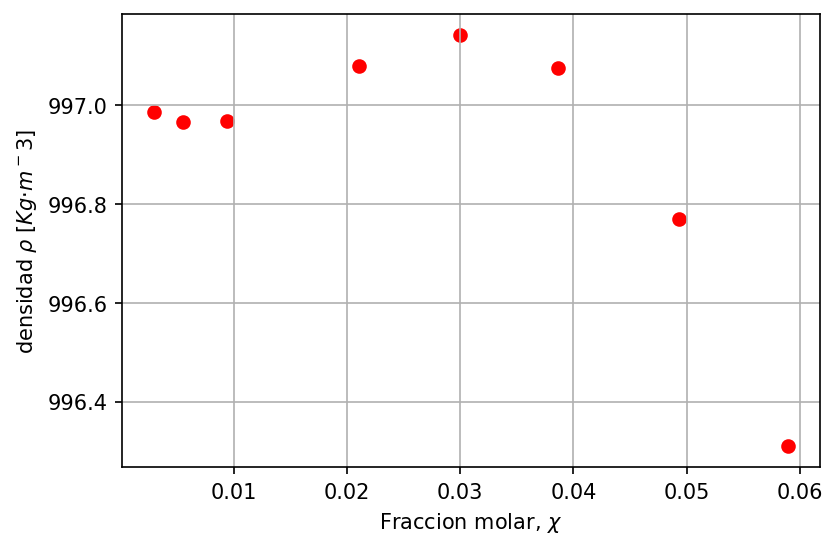

In [77]:
plt.scatter(fraccion_molar,densidad_mKg,
            c='red')


plt.xlabel('Fraccion molar, $\chi$')
plt.ylabel('densidad $\\rho$ [$Kg·m^-3]$')




plt.grid()
plt.savefig('densfrac.pdf')
plt.show()

vemos como a medida que aumenta la fraccion molar(concentracion de la ciclopentanona) disminuye la densidad, si disminuye la densidad tendriamos que observar un aumento de la velocidad del sonido en la mezcla ya que este opone menor resistencia a la onda por ser menos denso

### Representemos velocidad del sonido frente a fraccion molar:

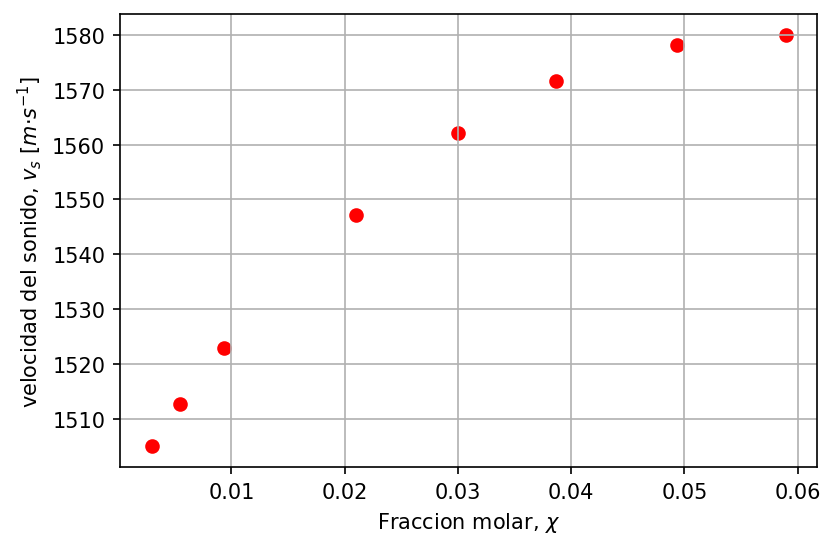

In [75]:
plt.scatter(fraccion_molar,vel_sonido,
            c='red')


plt.xlabel('Fraccion molar, $\chi$')
plt.ylabel('velocidad del sonido, $v_{s}$ $ [m·s^{-1}]$')
plt.grid()
plt.savefig('velfrac.pdf')
plt.show()

Podemos observar que empieza a saturar en torno a los 1580 para una concentracion de ~0.06 esto es, la velocidad del sonido del soluto tenderá a ~1580----Podriamos ver si ajusta a un logaritmo!!

# Represento ahora la compresibilidad adiabatica frente a la fraccion molar:

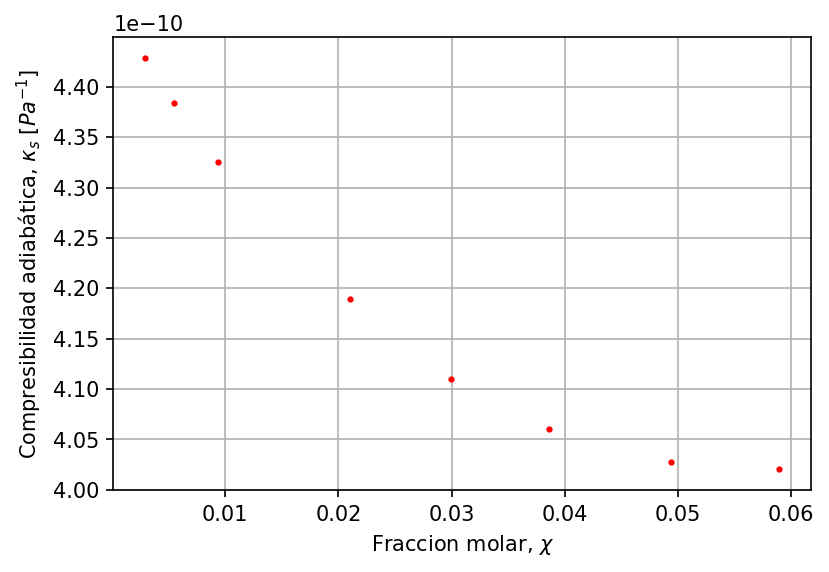

In [76]:
plt.errorbar(fraccion_molar, compresibilidad_adiabatica, yerr=s_compresibilidad_adiabatica, xerr=s_FM_cp, ms=2, c='r', fmt='o')


plt.xlabel('Fraccion molar, $\chi$')
plt.ylabel('Compresibilidad adiabática, $\kappa_{s}$ [$Pa^{-1}$]')
plt.grid()
plt.savefig('cadiabatica.pdf')
plt.show()

# Comenzamos el estudio con el tensoactivo

Hemos elegido una temperatura baja, suponiendo que el estudio de la tension superficial presentaría una mayor estabilidad para esta temperatura ( mayor precisión en las medidas) debido a una mayor densidad:

In [40]:
data_tensoactivo = np.loadtxt('datos_tensoactivo.txt', comments='%')

In [41]:
concentracion_tensoactivo = data_tensoactivo[:,0]

In [42]:
tension_superficial = data_tensoactivo[:,1]

In [43]:
s_tens_sup = data_tensoactivo[:,2]

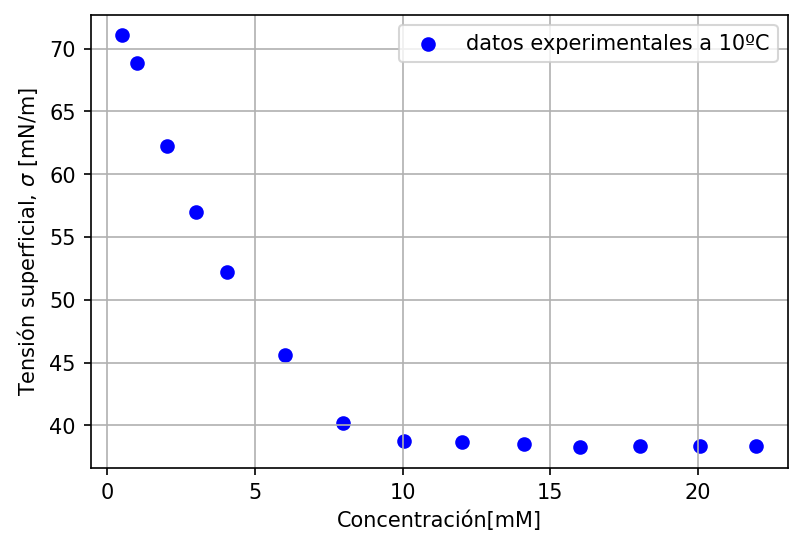

In [86]:
#Represento concentracion frente a tension:

plt.scatter(concentracion_tensoactivo,tension_superficial,
            c='blue',
           label='datos experimentales a 10ºC')

plt.xlabel('Concentración[mM]')
plt.ylabel('Tensión superficial, $\sigma$ [mN/m]')
plt.legend()
plt.grid()

plt.savefig('tension_concentracion.pdf')

plt.show()

### Pasemos al cálculo de la concentracion micelar crítica:
hemos obtenido el dato de la tension superficial del agua a 10º en https://www.researchgate.net/figure/Values-of-the-surface-tension-of-water-at-different-temperatures-1_tbl1_231143777

Defino la presion superficial como $\pi=\sigma_{agua} - \sigma$

In [45]:
tension_sup_agua = 74.01

In [46]:
pi = tension_sup_agua - tension_superficial

In [47]:
s_pi= s_tens_sup

In [48]:
print('presion superficial=',pi)
print('error presion superficial=',s_pi)

presion superficial= [ 2.94  5.14 11.8  17.02 21.83 28.4  33.79 35.22 35.37 35.53 35.73 35.63
 35.68 35.68]
error presion superficial= [0.01 0.01 0.02 0.01 0.01 0.01 0.02 0.01 0.01 0.02 0.02 0.   0.   0.01]


Calculo a su vez $\pi_{max}$ como la media de la presion superficial en la zona de saturacion que comienza en el dato 8 de la concentracion

In [49]:
zona_sat = (pi>= 35.22)

In [50]:
zona_sat_presion = pi[zona_sat]

In [51]:
#Pi max será la media:
pi_max=np.mean(zona_sat_presion)

In [52]:
s_i_cuadr=(s_pi)**2

suma_s_i= sum(s_i_cuadr)
s_pi_max=np.sqrt(suma_s_i)

In [53]:
print('presion max=',pi_max)
print('error presion max=',s_pi_max)

presion max= 35.548571428571435
error presion max= 0.048989794855663564


In [54]:
#Ahora grafico pi frente a la concentracion de tensoactivo:

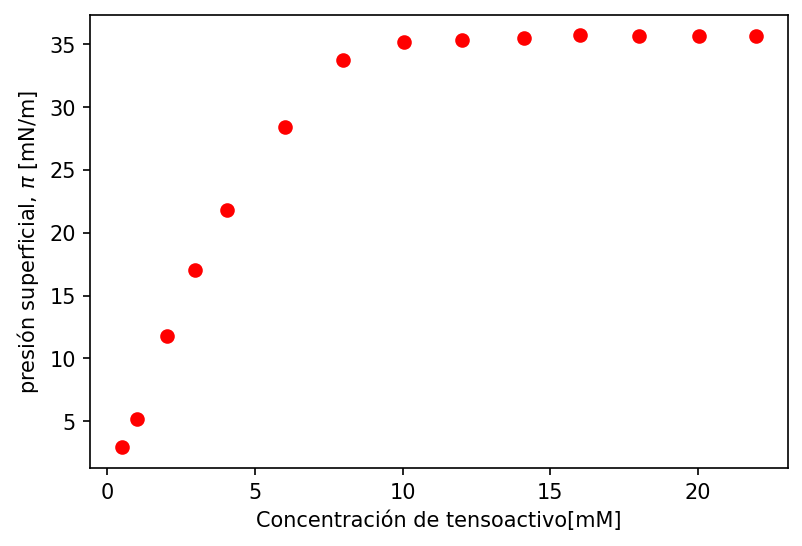

In [87]:
plt.scatter(concentracion_tensoactivo, pi,
           c='r',
           label='datos')
plt.xlabel('Concentración de tensoactivo[mM]')
plt.ylabel('presión superficial, $\pi$ [mN/m]')

plt.savefig('presion_superficial_concentracion.pdf')
plt.show()

### Ahora ajustamos los datos a la ecuacion (3) del artículo: Squeezing experimental measurements for a proper analysis of surfactant thermodynamics. El ajuste será de la forma y=ax + b, donde x=ln(concentracion):

In [56]:
x_concetracion= np.log(concentracion_tensoactivo)

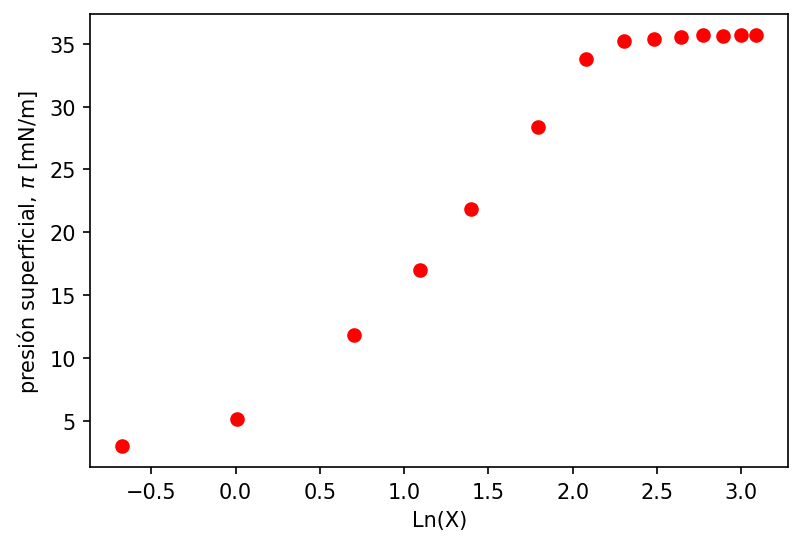

In [88]:
plt.scatter(x_concetracion, pi,
           c='r',
           label='datos')
plt.xlabel('Ln(X)')
plt.ylabel('presión superficial, $\pi$ [mN/m]')

plt.savefig('presion_superficial_lnx.pdf')
plt.show()

In [58]:
print('concentracion tensoactivo=',x_concetracion)
print('presion superficial=',pi)

concentracion tensoactivo= [-0.67334455  0.00995033  0.70309751  1.09527339  1.39871688  1.79342475
  2.07693841  2.30657711  2.48490665  2.6461748   2.77258872  2.89148225
  2.99822915  3.08967789]
presion superficial= [ 2.94  5.14 11.8  17.02 21.83 28.4  33.79 35.22 35.37 35.53 35.73 35.63
 35.68 35.68]


In [59]:
#Se tomarán los datos en las dos zonas donde el comportamiento lineal es claro:


#Zona 1-- puntos del 3 a 7
z1_pi=(pi<35.22)
z1_pi_num=pi[z1_pi]
z2_pi=(z1_pi_num>5.15)

#Pi para ajuste
z_lineal_pi=z1_pi_num[z2_pi]

z1_lnx=(x_concetracion<2.30657711)
z1_lnx_num=x_concetracion[z1_lnx]
z2_lnx=(z1_lnx_num>0.70309751)

#ln(x) para ajuste
z_lineal_lnx=z1_lnx_num[z2_lnx]



In [60]:
#Zona 2-- puntos del 8 a 14
z3_pi=(pi<36)
z3_pi_num=pi[z3_pi]
z4_pi=(z3_pi_num>35)

#Pi para ajuste
z_lineal_pi1=z3_pi_num[z4_pi]

z3_lnx=(x_concetracion<4)
z3_lnx_num=x_concetracion[z3_lnx]
z4_lnx=(z3_lnx_num>2.30657711)

#ln(x) para ajuste
z_lineal_lnx1=z3_lnx_num[z4_lnx]

In [61]:
# Realicemos el ajuste lineal para ambas zonas

def ajustelineal(x,a,b):
    return (x*a) + b


#ZONA 1
popt, pcov = curve_fit(ajustelineal, z_lineal_lnx, z_lineal_pi)
perr = np.sqrt(np.diag(pcov))

a_zona1=popt[0]
sa_zona1=perr[0]

b_zona1=popt[1]
sb_zona1=perr[1]

#ZONA 2
popt, pcov = curve_fit(ajustelineal, z_lineal_lnx1, z_lineal_pi1)
perr = np.sqrt(np.diag(pcov))

a_zona2=popt[0]
sa_zona2=perr[0]

b_zona2=popt[1]
sb_zona2=perr[1]



#Resultados:


#ZONA 1
print(a_zona1)
print(sa_zona1)

print(b_zona1)
print(sb_zona1)

#ZONA 2
print(a_zona2)
print(sa_zona2)

print(b_zona2)
print(sb_zona2)


16.030608559655047
0.5906416956467488
-0.09110790655793442
0.8832191446416275
0.6064017772956372
0.12938710614017562
33.88619574756826
0.3562954860196908


In [62]:

#El punto donde se intersectan las rectas será el perteneciente a la CMC


CMC=np.exp((b_zona2 - b_zona1)/(a_zona1 - a_zona2))

x_cmc=np.log(CMC)
y_cmc=(a_zona1*x_cmc) + b_zona1


#Propagando incertidumbre

s_CMC=np.sqrt((sb_zona2**2 +sb_zona1**2)*(CMC*(1/(a_zona1-a_zona2)))**2  +  (sa_zona1**2 + sa_zona2**2)*(CMC*((b_zona2-b_zona1)/((a_zona1-a_zona2)**2))**2))

print('concentracion micelar crítica=',CMC)
print('error concentracion micelar crítica=',s_CMC)

print('x_cmc=',x_cmc)
print('y_cmc=',y_cmc)

concentracion micelar crítica= 9.050824136399084
error concentracion micelar crítica= 0.6162832555824103
x_cmc= 2.202855818361167
y_cmc= 35.222011430948506


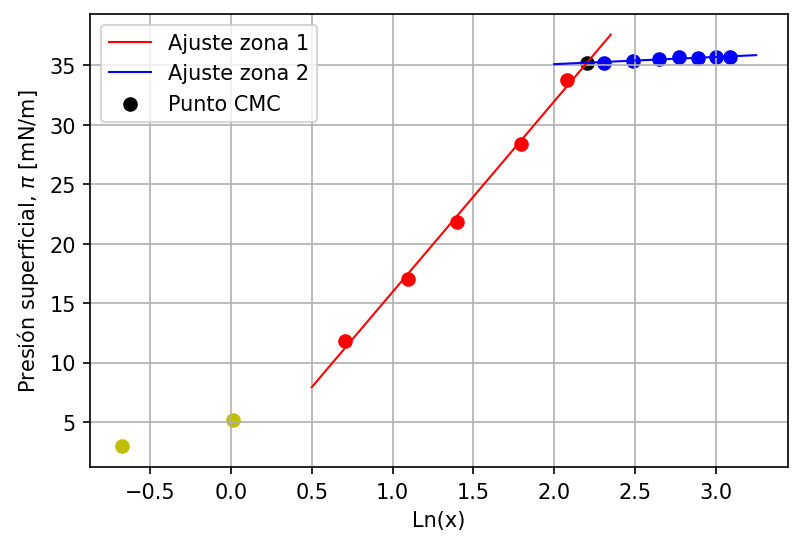

In [89]:
#Grafiquemos
import numpy as np


tfit=np.arange(0.5,2.35,0.0001)
pfit=np.arange(2,3.25,0.0001)

#ZONA 1
plt.scatter(z_lineal_lnx, z_lineal_pi,
           c='r')

random1= np.linspace(0,3,10)

plt.plot(tfit,ajustelineal(tfit,a_zona1,b_zona1),
         'r',
        linewidth=1,
        label='Ajuste zona 1')

#ZONA 2
plt.scatter(z_lineal_lnx1, z_lineal_pi1,
           c='b')

random2=np.linspace(2,4,10)

plt.plot(pfit,ajustelineal(pfit,a_zona2,b_zona2),
         'b',
        linewidth=1,
        label='Ajuste zona 2')


#PUNTO CMC
plt.scatter(x_cmc, y_cmc,
           c='black',
           label='Punto CMC')

#PUNTOS EXCLUIDOS

plt.scatter(-0.67334455, 2.94,
           c='y')


plt.scatter(0.00995033, 5.14,
           c='y')





plt.xlabel('Ln(x)')
plt.ylabel('Presión superficial, $\pi$ [mN/m]')

plt.grid()
plt.legend()

plt.savefig('presion_lnx.pdf')

plt.show()


### Obtenemos por tanto para la concentracion micelar crítica C=9.05(62)